# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

*Elias Fernandez*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos

# CONSTANTS
g = 9.8    

# PARAMETERS
ell = 1.0      # length of pendulum arm
theta_0 = 1.45 # initial displacement in radians
               # Note: this is *not* a small angle
omega_0 = 0.0  # initial angular velocity
dt = 0.01      # time sampling spacing
t_final = 8.0 # total number of seconds to run

def f(theta, theta_2, omega, omega_2, t):
    """d(theta)/dt"""
    return omega
def f2(theta, theta_2, omega, omega_2, t):
    """Bannana"""
    return omega_2
    
def h(theta, theta_2, omega, omega_2, t):
    """d(omega)/dt"""
    return -((omega**2*sin(2*theta-2*theta_2)+2*omega_2**2*sin(theta-theta_2)+(g/ell)*(sin(theta-2*theta_2)+3*sin(theta)))/(3-cos(2*theta-2*theta_2)))
def h2(theta, theta_2, omega, omega_2, t):
    """Peach"""
    return ((4*omega**2*sin(theta-theta_2)+omega_2**2*sin(2*theta-2*theta_2)+2*(g/ell)*(sin(2*theta-theta_2)-sin(theta)))/(3-cos(2*theta-2*theta_2)))

# TIME SLICES (depends on dt and t_final)
tpoints = np.arange(0, t_final, dt)

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta_points = []
    theta_2_points=[]
    omega_points = []
    omega_2_points=[]
    
    
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    theta_2=theta_0
    omega_2=omega_0

    
    for t in tpoints:
        
        theta_points.append(theta)
        theta_2_points.append(theta_2)
        omega_points.append(omega)
        omega_2_points.append(omega_2)
        
            

        k1 = dt*f(theta_points[-1], theta_2_points[-1], omega_points[-1], omega_2_points[-1], t) 
        k2 = dt*f(theta_points[-1] + 0.5*k1, theta_2_points[-1] + 0.5*k1, omega_points[-1], omega_2_points[-1], t + 0.5*dt)  
        
        theta += k2
        
        b1 = dt*h(theta_points[-1], theta_2_points[-1], omega_points[-1], omega_2_points[-1], t)  
        b2 = dt*h(theta_points[-1] + 0.5*b1, theta_2_points[-1] + 0.5*b1, omega_points[-1], omega_2_points[-1], t + 0.5*dt)  
        
        omega += b2
        
        r1 = dt*f2(theta_points[-1], theta_2_points[-1], omega_points[-1], omega_2_points[-1], t) 
        r2 = dt*f2(theta_points[-1] + 0.5*r1, theta_2_points[-1] + 0.5*r1, omega_points[-1], omega_2_points[-1], t + 0.5*dt)  
        
        theta_2 += r2
        
        d1 = dt*h2(theta_points[-1], theta_2_points[-1], omega_points[-1], omega_2_points[-1], t)  
        d2 = dt*h2(theta_points[-1] + 0.5*d1, theta_2_points[-1] + 0.5*d1, omega_points[-1], omega_2_points[-1], t + 0.5*dt)  
        
        omega_2 += d2
        


    tt = np.array(tpoints)
    thetas = np.array(theta_points)
    thetas_2=np.array(theta_2_points)
    omegas = np.array(omega_points)
    omegas_2=np.array(omega_2_points)
    
    return tt, thetas, thetas_2, omegas, omegas_2


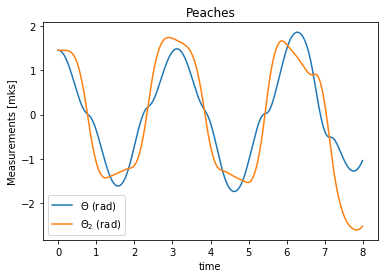

In [110]:
times, thetas, thetas_2, omegas, omegas_2 = time_and_angles()

plt.plot(times, thetas, label='$\Theta$ (rad)')
plt.plot(times, thetas_2, label='$\Theta_2$ (rad)')
"plt.plot(times, omegas, label='$\omega$ (rad/s)')"
"plt.plot(times, omegas_2, label='$\omega_2$ (rad/s)')"
plt.title("Peaches")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

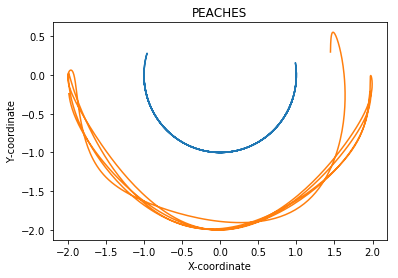

In [112]:
x1 = np.sin(thetas)
y1 = np.cos(thetas)
x2 = np.sin(thetas) + np.sin(thetas_2)
y2 = np.cos(thetas) + np.cos(thetas_2)
x1 = x1*-1
x2 = x2*-1
y1 = y1*-1
y2 = y2*-1

plt.plot(x1, y1, label='First Ball')
plt.plot(x2, y2, label='Second Ball')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('PEACHES')
plt.show()

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

GUESS: Along the diagnal (\ <= that way) There should be zero potential and as you get near the charged sources it should gradually increase/decrease as you get closer to the charges.